# Fixed parameters

In this notebook we will show how to use fixed parameters. Therefore,
we employ our Rosenbrock example. We define two problems, where for the
first problem all parameters are optimized, and for the second we fix some
of them to specified values.

## Define problem

In [1]:
import pypesto
import pypesto.visualize
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                              grad=sp.optimize.rosen_der, 
                              hess=sp.optimize.rosen_hess)

dim_full = 4
lb = -2 * np.ones((dim_full,1))
ub = 2 * np.ones((dim_full,1))

problem1 = pypesto.Problem(objective=objective, lb=lb, ub=ub)

x_fixed_indices = [1, 3]
x_fixed_vals = [1, 1]
problem2 = pypesto.Problem(objective=objective, lb=lb, ub=ub,
                           x_fixed_indices=x_fixed_indices,
                           x_fixed_vals=x_fixed_vals)

## Optimize

In [3]:
optimizer = pypesto.ScipyOptimizer()
n_starts = 10

result1 = pypesto.minimize(problem=problem1, optimizer=optimizer, 
                           n_starts=n_starts)
result2 = pypesto.minimize(problem=problem2, optimizer=optimizer, 
                           n_starts=n_starts)

/home/yannik/yenv/lib/python3.6/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)
/home/yannik/yenv/lib/python3.6/site-packages/scipy/optimize/_minimize.py:513: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  'information (hessp).' % method, RuntimeWarning)


## Visualize

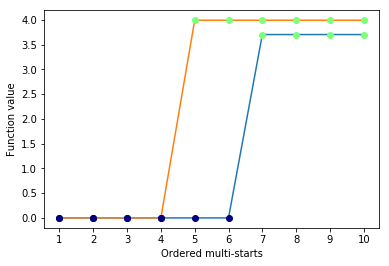

In [4]:
fig, ax = plt.subplots()
pypesto.visualize.waterfall(result1, ax)
pypesto.visualize.waterfall(result2, ax)

In [5]:
result1.optimize_result.as_dataframe(['fval', 'x', 'grad'])

,fval,grad,x
0,4.292891e-16,"[-7.332260170147267e-07, 6.00438377176788e-07,...","[1.0000000009080277, 1.0000000036536605, 1.000..."
1,1.894812e-14,"[1.0143040655355948e-06, -3.768456551085359e-0...","[0.9999999762815422, 0.9999999499087325, 0.999..."
2,1.359270e-13,"[-1.8303102181312013e-06, 7.581252371080891e-0...","[1.0000000541043716, 1.0000001130550433, 1.000..."
3,8.273390e-13,"[1.7535436085698887e-05, -2.23725263215039e-05...","[0.9999999495177628, 0.9999998549445246, 0.999..."
4,8.666391e-13,"[2.2098568402387052e-05, 1.84585149671918e-05,...","[1.0000000492575694, 1.0000000435150107, 1.000..."
5,7.542493e-12,"[-8.293911654503592e-05, -2.3853116980019994e-...","[1.0000000231573303, 1.0000002537782342, 1.000..."
6,3.701429e+00,"[-5.393017782573395e-06, 3.8823934878085e-06, ...","[-0.7756593294728725, 0.6130935068901302, 0.38..."
7,3.701429e+00,"[1.4928992439156019e-05, 1.7335570439813708e-0...","[-0.7756594156540532, 0.6130937053675443, 0.38..."
8,3.701429e+00,"[6.635640943386534e-07, 3.067933507239218e-08,...","[-0.7756598562371931, 0.6130943392127992, 0.38..."
9,3.701429e+00,"[0.00018246074072747476, 5.346183133170257e-05...","[-0.775659336026642, 0.6130941224674133, 0.382..."


In [6]:
result2.optimize_result.as_dataframe(['fval', 'x', 'grad'])

,fval,grad,x
0,9.393846e-23,"[3.486801958276067e-10, nan, -1.90672810873564...","[1.0000000000004348, 1.0, 0.9999999999998097, ..."
1,5.067533e-20,"[4.74636019379164e-09, nan, -8.567817122381655...","[1.0000000000059182, 1.0, 0.9999999999914493, ..."
2,1.422782e-17,"[1.3155198044166613e-07, nan, 8.30116442306856...","[1.00000000016403, 1.0, 1.000000000082846, 1.0]"
3,1.792320e-17,"[-1.6849071156976416e-07, nan, 2.1198722777529...","[0.9999999997899118, 1.0, 1.0000000000211564, ..."
4,3.989975e+00,"[4.2017434864760617e-08, nan, 4.18708148167226...","[-0.9949747467773946, 1.0, 1.0000000000417872,..."
5,3.989975e+00,"[8.314876178694419e-07, nan, 6.692197386486704...","[-0.9949747457780269, 1.0, 1.000000000667884, ..."
6,3.989975e+00,"[-1.949972376902309e-06, nan, 3.57199036033733...","[-0.9949747492989974, 1.0, 1.0000000035648606,..."
7,3.989975e+00,"[-7.962196425737034e-06, nan, -4.4994281146129...","[-0.9949747569096994, 1.0, 0.9999999955095528,..."
8,3.989975e+00,"[3.1302750342909746e-06, nan, -1.7495793893550...","[-0.9949747428680578, 1.0, 0.9999999825391275,..."
9,3.989975e+00,"[-1.9297693789610548e-05, nan, 1.3346228618525...","[-0.9949747712589799, 1.0, 1.0000000133195892,..."
